In [3]:
import pandas as pd
breast_cancer_data= pd.read_csv(r"D:\AI\breast-cancer.csv")
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
breast_cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_17412\1011933459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=breast_cancer_data['diagnosis'], palette='coolwarm')


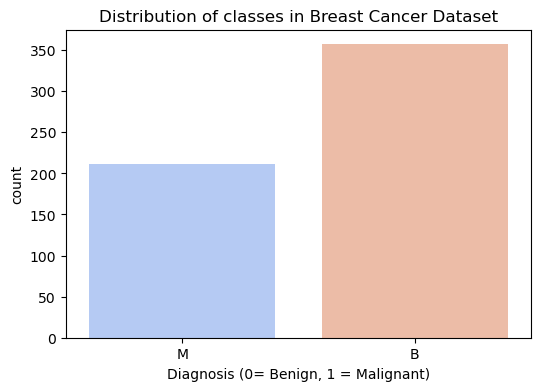

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=breast_cancer_data['diagnosis'], palette='coolwarm')
plt.title('Distribution of classes in Breast Cancer Dataset')
plt.xlabel('Diagnosis (0= Benign, 1 = Malignant)')
plt.ylabel('count')
plt.show()

In [8]:
breast_cancer_data.drop(columns= ['id'], inplace=True)


In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
breast_cancer_data['diagnosis']= label_encoder.fit_transform(breast_cancer_data['diagnosis'])

X_bc= breast_cancer_data.drop(columns= ['diagnosis'])
y_bc= breast_cancer_data['diagnosis']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size= 0.2, random_state=42)

scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc= scaler_bc.transform(X_test_bc)

knn_bc_model = KNeighborsClassifier(n_neighbors= 9, metric='euclidean')
knn_bc_model.fit(X_train_bc, y_train_bc)

y_pred_bc = knn_bc_model.predict(X_test_bc)

print("Breast Cancer Detection Accuracy:", accuracy_score(y_test_bc, y_pred_bc))
print("Confusion Matrix: \n", confusion_matrix(y_test_bc, y_pred_bc))
print("Classification Report:\n, ", classification_report(y_test_bc,y_pred_bc))

Breast Cancer Detection Accuracy: 0.9649122807017544
Confusion Matrix: 
 [[69  2]
 [ 2 41]]
Classification Report:
,                precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [19]:
import numpy as np 
sample_feature= np.array([X_test_bc[0]])
label_map = {0:'B',1:'M'}

predicted_class = knn_bc_model.predict(sample_feature) 
predicted_label = label_encoder.inverse_transform(predicted_class) 
print("Predicted Diagonsis: ", label_map[0])

Predicted Diagonsis:  B


In [12]:
import pickle

# Save the trained KNN model
with open("knn_bc_model.pkl", "wb") as model_file:
    pickle.dump(knn_bc_model, model_file)

# Save the fitted scaler
with open("scaler_bc.pkl", "wb") as scaler_file:
    pickle.dump(scaler_bc, scaler_file)


In [41]:
# Load the KNN model
with open("knn_bc_model.pkl", "rb") as model_file:
    knn_bc_model_loaded = pickle.load(model_file)

# Load the scaler
with open("scaler_bc.pkl", "rb") as scaler_file:
    scaler_bc_loaded = pickle.load(scaler_file)
